In [19]:
import csv
import matplotlib.pyplot as plt



In [20]:
def upslopes(ppg, v=0):

    if v == 1:
        color = ['tab:blue', 'tab:orange']
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        ax1.plot(ppg, color='k', linewidth=1.2)
        ax1.set_title('Peak Detection')
        ax1.set_xlabel('Samples')
        ax1.set_ylabel('PPG')
        ax1.grid(True)

        ax2.plot(ppg, color='k', linewidth=1.2)
        ax2.set_title('Upslopes')
        ax2.set_xlabel('Samples')
        ax2.set_ylabel('PPG')
        ax2.grid(True)

    th = 6
    pks = []
    pos_peak = []
    pos_peak_b = 0
    n_pos_peak = 0
    n_up = 0

    for i in range(1, len(ppg)):
        if ppg[i] > ppg[i - 1]:
            n_up += 1
            if v == 1:
                ax2.plot(i, ppg[i], '.', color=color[0])
        else:
            if n_up >= th:
                pos_peak.append(i)
                pos_peak_b = 1
                n_pos_peak += 1
                n_up_pre = n_up
                if v == 1:
                    ax2.plot(pos_peak[n_pos_peak-1], ppg[pos_peak[n_pos_peak-1]], 'ok', markerfacecolor=color[1])
            else:
                if pos_peak_b == 1:
                    if ppg[i - 1] > ppg[pos_peak[n_pos_peak - 1]]:
                        pos_peak[n_pos_peak - 1] = i - 1
                    else:
                        pks.append(pos_peak[n_pos_peak - 1])
                        if v == 1:
                            ax2.plot(pks[-1], ppg[pks[-1]], 'ok', markerfacecolor='r')
                    th = int(0.6 * n_up_pre)
                    pos_peak_b = 0
            n_up = 0

    if v == 1:
        ax1.plot([int(i) for i in pks], [ppg[int(i)] for i in pks], 'ok', markerfacecolor=color[0])
        plt.tight_layout()
        plt.show()
    return pks 

In [3]:
def upslopes(ppg):
    th = 6
    pks = []
    pos_peak = []
    pos_peak_b = 0
    n_pos_peak = 0
    n_up = 0
    n_up_pre = 0

    for i in range(1, len(ppg)):
        if ppg[i] > ppg[i - 1]:
            n_up += 1
        else:
            if n_up >= th:
                pos_peak.append(i)
                pos_peak_b = 1
                n_pos_peak += 1
                n_up_pre = n_up
            else:
                if pos_peak_b == 1:
                    if ppg[i - 1] > ppg[pos_peak[n_pos_peak - 1]]:
                        pos_peak[n_pos_peak - 1] = i - 1
                    else:
                        pks.append(pos_peak[n_pos_peak - 1])
                    th = int(0.6 * n_up_pre)
                    pos_peak_b = 0
            n_up = 0

    return pks



In [29]:
def tidy_beats(beats):
    result = sorted(list(set(beats)))
    return result

def pulse_onsets_from_peaks(sig, peaks):
    onsets = []

    for wave_no in range(len(peaks) - 1):
        min_index = 0
        min_value = float('inf')

        for i in range(int(peaks[wave_no]), int(peaks[wave_no + 1])):
            if sig[i] < min_value:
                min_value = sig[i]
                min_index = i

        onsets.append(min_index+1)

    plt.plot(sig, color='k', linewidth=1.2)
    plt.scatter(onsets, [sig[i] for i in onsets], color='red', label='Pulse Onsets')
    plt.xlabel('Samples')
    plt.ylabel('PPG')
    plt.title('Pulse Onsets from Peaks')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return onsets

In [15]:
sig = [
    0.002108
,0.000777
,-0.000236
,-0.00081
,-0.000986
,-0.00093
,-0.00085
,-0.000906
,-0.001152
,-0.001538
,-0.001981
,-0.002424
,-0.002888
,-0.003457
,-0.004207
,-0.005113
,-0.005997
,-0.00655
,-0.006437
,-0.005437
,-0.003563
,-0.001083
,0.001556
,0.003885
,0.00558
,0.006553
,0.00695
,0.00705
,0.007118
,0.007295
,0.007553
,0.007737
,0.007656
,0.007187
,0.006331
,0.005218
,0.004053
,0.00304
,0.002312
,0.001889
,0.001689
,0.001554
,0.001335
,0.000951
,0.000419
,-0.000166
,-0.000692
,-0.001099
,-0.001426
,-0.001802
,-0.002364
,-0.003161
,-0.004067
,-0.004791
,-0.00496
,-0.004278
,-0.002659
,-0.000295
,0.002399
,0.004937
,0.006934
,0.008231
,0.008918
,0.00925
,0.009502
,0.009849
,0.010296
,0.010715
,0.010921
,0.010778
,0.010257
,0.009456
,0.00854
,0.007689
,0.007034
,0.006623
,0.006415
,0.006316
,0.006224
,0.006072
,0.005851
,0.005602
,0.005377
,0.005197
,0.005016
,0.004733
,0.004246
,0.00353
,0.002692
,0.001974
,0.001682
,0.002073
,0.003235
,0.005035
,0.00715
,0.009183
,0.0108
,0.011848
,0.012374
,0.012573
,0.012674
,0.012836
,0.013088
,0.013324
,0.013387
,0.013144
,0.012553
,0.011678
,0.010663
,0.009678
,0.008852
,0.008237
]

In [22]:
data = open('./subject1.csv')
reader = csv.reader(data)
sig = []

for row in reader:
    if(row[0] == 'pleth') : continue
    sig.append(float(row[0]))



In [24]:
sigs = sig[1004000:1006000]

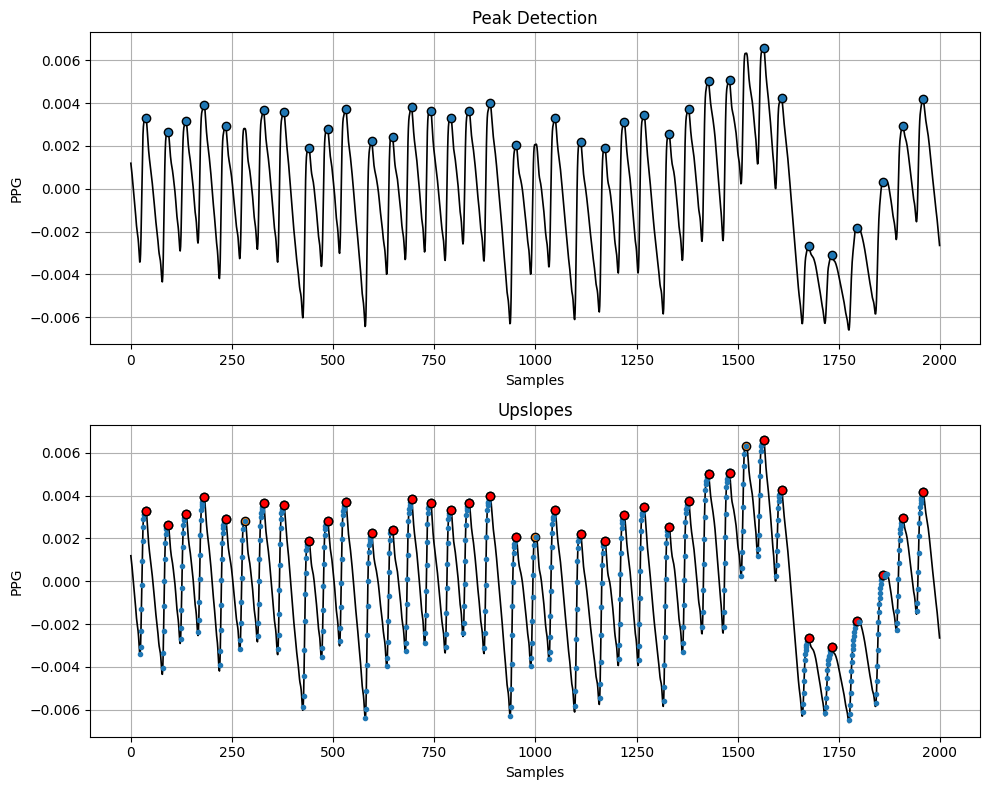

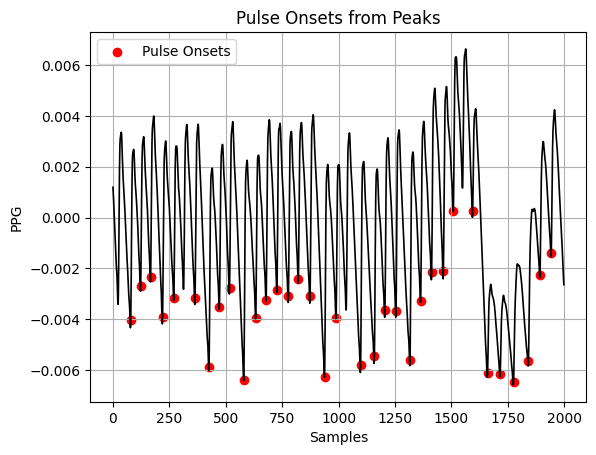

In [30]:
peaks = upslopes(sigs,1)

tidy_peaks = tidy_beats(peaks)

onsets = pulse_onsets_from_peaks(sigs, peaks)